🤖 SPACEX FALCON 9 - MACHINE LEARNING PREDICTION
✅ pandas already installed
✅ numpy already installed
✅ matplotlib already installed
📦 Installing scikit-learn...
✅ scikit-learn installed
✅ seaborn already installed

✅ All libraries imported successfully!
📊 Pandas version: 3.0.1
🤖 Scikit-learn version: 1.8.0

📂 LOADING SPACEX DATASETS
📥 Downloading dataset_part_2.csv...
✅ dataset_part_2.csv downloaded
📥 Downloading dataset_part_3.csv...
✅ dataset_part_3.csv downloaded

📊 dataset_part_2.csv shape: (90, 18)
📊 dataset_part_3.csv shape: (90, 83)

📋 First 5 rows of data (part 2):
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-

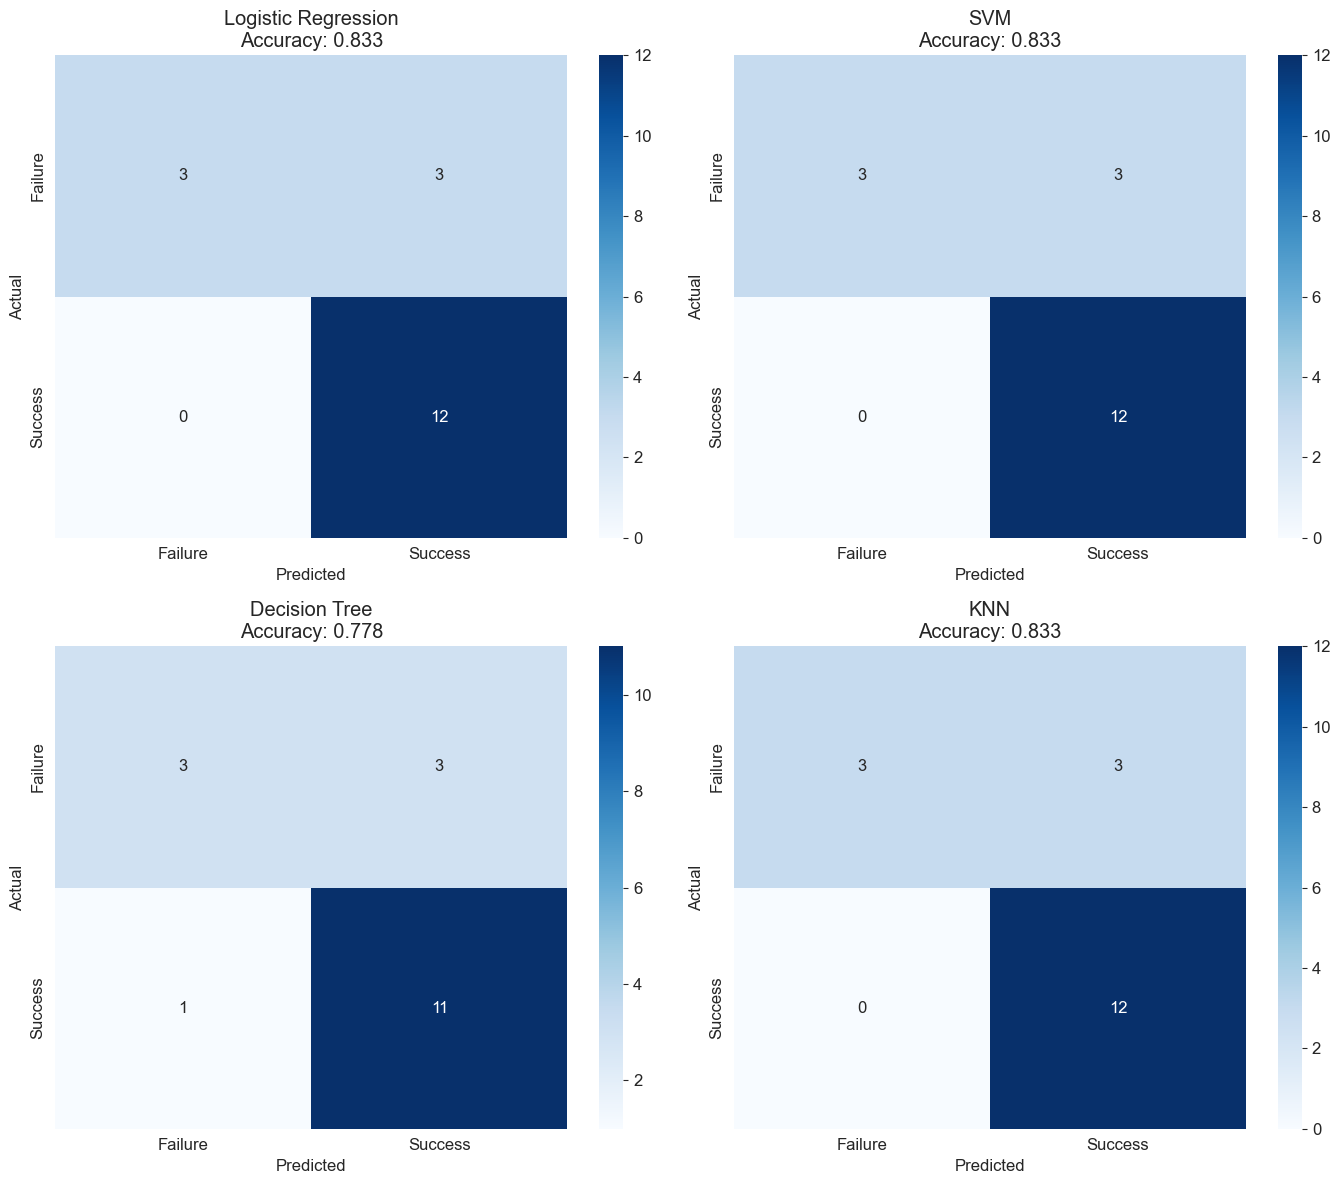


📊 Classification Reports

Logistic Regression Classification Report:
----------------------------------------
              precision    recall  f1-score   support

     Failure       1.00      0.50      0.67         6
     Success       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


SVM Classification Report:
----------------------------------------
              precision    recall  f1-score   support

     Failure       1.00      0.50      0.67         6
     Success       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Decision Tree Classification Report:
----------------------------------------
              precision    recall  f1-score   support

     Failure       0.75      0.5

In [1]:
# =============================================================================
# SPACEX FALCON 9 - COMPLETE MACHINE LEARNING PREDICTION (ALL TASKS 1-12)
# IBM Data Science Capstone Project - PORTABLE VERSION
# =============================================================================

# =============================================================================
# CELL 1: INSTALL AND IMPORT LIBRARIES
# =============================================================================

import subprocess
import sys
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🤖 SPACEX FALCON 9 - MACHINE LEARNING PREDICTION")
print("="*80)

# Install required packages
required_packages = ['pandas', 'numpy', 'matplotlib', 'scikit-learn', 'seaborn']
for package in required_packages:
    try:
        __import__(package.replace('-', '_'))
        print(f"✅ {package} already installed")
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        print(f"✅ {package} installed")

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn modules properly
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import sklearn to get version
import sklearn

import os
import urllib.request

# Set style
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

print("\n✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🤖 Scikit-learn version: {sklearn.__version__}")

# =============================================================================
# CELL 2: LOAD DATASETS
# =============================================================================

print("\n" + "="*80)
print("📂 LOADING SPACEX DATASETS")
print("="*80)

# Download datasets if not present
data_url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data_url_3 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

local_path_2 = "dataset_part_2.csv"
local_path_3 = "dataset_part_3.csv"

if not os.path.exists(local_path_2):
    print("📥 Downloading dataset_part_2.csv...")
    urllib.request.urlretrieve(data_url_2, local_path_2)
    print("✅ dataset_part_2.csv downloaded")
else:
    print("✅ dataset_part_2.csv already exists")

if not os.path.exists(local_path_3):
    print("📥 Downloading dataset_part_3.csv...")
    urllib.request.urlretrieve(data_url_3, local_path_3)
    print("✅ dataset_part_3.csv downloaded")
else:
    print("✅ dataset_part_3.csv already exists")

# Load the data
data = pd.read_csv(local_path_2)
X = pd.read_csv(local_path_3)

print(f"\n📊 dataset_part_2.csv shape: {data.shape}")
print(f"📊 dataset_part_3.csv shape: {X.shape}")
print(f"\n📋 First 5 rows of data (part 2):")
print(data.head())
print(f"\n📋 First 5 rows of X (part 3):")
print(X.head())

# =============================================================================
# CELL 3: TASK 1 - CREATE Y ARRAY FROM CLASS COLUMN
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 1: Creating Y array from Class column")
print("="*80)

Y = data['Class'].to_numpy()
print(f"✅ Y shape: {Y.shape}")
print(f"✅ Unique values in Y: {np.unique(Y)}")
print(f"✅ Class distribution: {np.bincount(Y.astype(int))}")
print(f"   - Success (1): {np.sum(Y==1)} launches")
print(f"   - Failure (0): {np.sum(Y==0)} launches")
print(f"   - Success rate: {np.mean(Y)*100:.1f}%")

# =============================================================================
# CELL 4: TASK 2 - STANDARDIZE THE DATA
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 2: Standardizing the data")
print("="*80)

transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)
print("✅ Data standardized successfully!")
print(f"✅ X_scaled shape: {X_scaled.shape}")
print(f"✅ Mean of first 5 features (should be ~0): {X_scaled.mean(axis=0)[:5]}")
print(f"✅ Std of first 5 features (should be ~1): {X_scaled.std(axis=0)[:5]}")

# =============================================================================
# CELL 5: TASK 3 - SPLIT DATA INTO TRAINING AND TESTING
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 3: Splitting data into training and testing sets")
print("="*80)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)
print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ X_test shape: {X_test.shape}")
print(f"✅ Y_train shape: {Y_train.shape}")
print(f"✅ Y_test shape: {Y_test.shape}")
print(f"✅ Number of test samples: {Y_test.shape[0]}")
print(f"✅ Training set class distribution: {np.bincount(Y_train.astype(int))}")
print(f"✅ Test set class distribution: {np.bincount(Y_test.astype(int))}")

# =============================================================================
# CELL 6: TASK 4 - LOGISTIC REGRESSION WITH GRIDSEARCHCV
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 4: Logistic Regression with GridSearchCV")
print("="*80)

parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression(random_state=2)
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10, scoring='accuracy')
logreg_cv.fit(X_train, Y_train)

print(f"✅ Best parameters: {logreg_cv.best_params_}")
print(f"✅ Validation accuracy: {logreg_cv.best_score_:.4f}")

# =============================================================================
# CELL 7: TASK 5 - LOGISTIC REGRESSION TEST ACCURACY
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 5: Logistic Regression Test Accuracy")
print("="*80)

logreg_test_accuracy = logreg_cv.score(X_test, Y_test)
print(f"✅ Logistic Regression Test Accuracy: {logreg_test_accuracy:.4f}")

# Predict and show confusion matrix
yhat_lr = logreg_cv.predict(X_test)
cm_lr = confusion_matrix(Y_test, yhat_lr)

print("\n📊 Logistic Regression Confusion Matrix:")
print("                 Predicted")
print("                 Failure  Success")
print(f"Actual Failure     {cm_lr[0,0]}       {cm_lr[0,1]}")
print(f"Actual Success     {cm_lr[1,0]}       {cm_lr[1,1]}")
print(f"\nTrue Negatives: {cm_lr[0,0]}, False Positives: {cm_lr[0,1]}")
print(f"False Negatives: {cm_lr[1,0]}, True Positives: {cm_lr[1,1]}")

# =============================================================================
# CELL 8: TASK 6 - SUPPORT VECTOR MACHINE WITH GRIDSEARCHCV
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 6: Support Vector Machine with GridSearchCV")
print("="*80)

parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC(random_state=2)
svm_cv = GridSearchCV(svm, parameters_svm, cv=10, scoring='accuracy')
svm_cv.fit(X_train, Y_train)

print(f"✅ Best parameters: {svm_cv.best_params_}")
print(f"✅ Validation accuracy: {svm_cv.best_score_:.4f}")

# =============================================================================
# CELL 9: TASK 7 - SVM TEST ACCURACY
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 7: SVM Test Accuracy")
print("="*80)

svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"✅ SVM Test Accuracy: {svm_test_accuracy:.4f}")

# Predict and show confusion matrix
yhat_svm = svm_cv.predict(X_test)
cm_svm = confusion_matrix(Y_test, yhat_svm)

print("\n📊 SVM Confusion Matrix:")
print("                 Predicted")
print("                 Failure  Success")
print(f"Actual Failure     {cm_svm[0,0]}       {cm_svm[0,1]}")
print(f"Actual Success     {cm_svm[1,0]}       {cm_svm[1,1]}")
print(f"\nTrue Negatives: {cm_svm[0,0]}, False Positives: {cm_svm[0,1]}")
print(f"False Negatives: {cm_svm[1,0]}, True Positives: {cm_svm[1,1]}")

# =============================================================================
# CELL 10: TASK 8 - DECISION TREE WITH GRIDSEARCHCV
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 8: Decision Tree with GridSearchCV")
print("="*80)

parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, parameters_tree, cv=10, scoring='accuracy')
tree_cv.fit(X_train, Y_train)

print(f"✅ Best parameters: {tree_cv.best_params_}")
print(f"✅ Validation accuracy: {tree_cv.best_score_:.4f}")

# =============================================================================
# CELL 11: TASK 9 - DECISION TREE TEST ACCURACY
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 9: Decision Tree Test Accuracy")
print("="*80)

tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"✅ Decision Tree Test Accuracy: {tree_test_accuracy:.4f}")

# Predict and show confusion matrix
yhat_tree = tree_cv.predict(X_test)
cm_tree = confusion_matrix(Y_test, yhat_tree)

print("\n📊 Decision Tree Confusion Matrix:")
print("                 Predicted")
print("                 Failure  Success")
print(f"Actual Failure     {cm_tree[0,0]}       {cm_tree[0,1]}")
print(f"Actual Success     {cm_tree[1,0]}       {cm_tree[1,1]}")
print(f"\nTrue Negatives: {cm_tree[0,0]}, False Positives: {cm_tree[0,1]}")
print(f"False Negatives: {cm_tree[1,0]}, True Positives: {cm_tree[1,1]}")

# =============================================================================
# CELL 12: TASK 10 - K-NEAREST NEIGHBORS WITH GRIDSEARCHCV
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 10: K-Nearest Neighbors with GridSearchCV")
print("="*80)

parameters_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10, scoring='accuracy')
knn_cv.fit(X_train, Y_train)

print(f"✅ Best parameters: {knn_cv.best_params_}")
print(f"✅ Validation accuracy: {knn_cv.best_score_:.4f}")

# =============================================================================
# CELL 13: TASK 11 - KNN TEST ACCURACY
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 11: KNN Test Accuracy")
print("="*80)

knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"✅ KNN Test Accuracy: {knn_test_accuracy:.4f}")

# Predict and show confusion matrix
yhat_knn = knn_cv.predict(X_test)
cm_knn = confusion_matrix(Y_test, yhat_knn)

print("\n📊 KNN Confusion Matrix:")
print("                 Predicted")
print("                 Failure  Success")
print(f"Actual Failure     {cm_knn[0,0]}       {cm_knn[0,1]}")
print(f"Actual Success     {cm_knn[1,0]}       {cm_knn[1,1]}")
print(f"\nTrue Negatives: {cm_knn[0,0]}, False Positives: {cm_knn[0,1]}")
print(f"False Negatives: {cm_knn[1,0]}, True Positives: {cm_knn[1,1]}")

# =============================================================================
# CELL 14: TASK 12 - MODEL PERFORMANCE COMPARISON
# =============================================================================

print("\n" + "="*80)
print("📌 TASK 12: Model Performance Comparison")
print("="*80)

# Collect all results
results = {
    'Logistic Regression': {
        'Best Params': logreg_cv.best_params_,
        'Validation Accuracy': logreg_cv.best_score_,
        'Test Accuracy': logreg_test_accuracy,
        'Confusion Matrix': cm_lr
    },
    'SVM': {
        'Best Params': svm_cv.best_params_,
        'Validation Accuracy': svm_cv.best_score_,
        'Test Accuracy': svm_test_accuracy,
        'Confusion Matrix': cm_svm
    },
    'Decision Tree': {
        'Best Params': tree_cv.best_params_,
        'Validation Accuracy': tree_cv.best_score_,
        'Test Accuracy': tree_test_accuracy,
        'Confusion Matrix': cm_tree
    },
    'KNN': {
        'Best Params': knn_cv.best_params_,
        'Validation Accuracy': knn_cv.best_score_,
        'Test Accuracy': knn_test_accuracy,
        'Confusion Matrix': cm_knn
    }
}

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Validation Accuracy': [results[m]['Validation Accuracy'] for m in results],
    'Test Accuracy': [results[m]['Test Accuracy'] for m in results]
})
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("\n📊 Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model
best_model = comparison_df.iloc[0]['Model']
best_test_acc = comparison_df.iloc[0]['Test Accuracy']
best_val_acc = comparison_df.iloc[0]['Validation Accuracy']

print(f"\n" + "="*80)
print(f"🏆 BEST MODEL: {best_model}")
print(f"   Validation Accuracy: {best_val_acc:.4f}")
print(f"   Test Accuracy: {best_test_acc:.4f}")
print("="*80)

# Print detailed results
print("\n📊 DETAILED MODEL RESULTS:")
print("-" * 60)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  Best Parameters: {metrics['Best Params']}")
    print(f"  Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}")
    cm = metrics['Confusion Matrix']
    print(f"  Confusion Matrix: [[{cm[0,0]}, {cm[0,1]}], [{cm[1,0]}, {cm[1,1]}]]")

# =============================================================================
# CELL 15: VISUALIZE CONFUSION MATRICES
# =============================================================================

print("\n" + "="*80)
print("📊 Visualizing Confusion Matrices")
print("="*80)

def plot_confusion_matrix(cm, model_name, ax):
    """Plot confusion matrix using seaborn"""
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Failure', 'Success'],
                yticklabels=['Failure', 'Success'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name}\nAccuracy: {results[model_name]["Test Accuracy"]:.3f}')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
for i, model_name in enumerate(model_names):
    plot_confusion_matrix(results[model_name]['Confusion Matrix'], model_name, axes[i])

plt.tight_layout()
plt.show()

# =============================================================================
# CELL 16: CLASSIFICATION REPORTS
# =============================================================================

print("\n" + "="*80)
print("📊 Classification Reports")
print("="*80)

for model_name in model_names:
    print(f"\n{model_name} Classification Report:")
    print("-" * 40)
    if model_name == 'Logistic Regression':
        y_pred = yhat_lr
    elif model_name == 'SVM':
        y_pred = yhat_svm
    elif model_name == 'Decision Tree':
        y_pred = yhat_tree
    else:
        y_pred = yhat_knn
    
    print(classification_report(Y_test, y_pred, target_names=['Failure', 'Success']))

# =============================================================================
# CELL 17: SAVE FIGURES TO LOCAL FOLDER (OPTIONAL - COMMENT OUT IF NOT NEEDED)
# =============================================================================

# Uncomment the following section if you want to save the figures locally

print("\n" + "="*80)
print("💾 SAVING FIGURES TO LOCAL FOLDER (OPTIONAL)")
print("="*80)

# Create a local folder for results
results_folder = "ml_results"
os.makedirs(results_folder, exist_ok=True)
print(f"✅ Created folder: {results_folder}")

# Dictionary to store confusion matrices
cm_dict = {
    'Logistic Regression': cm_lr,
    'SVM': cm_svm,
    'Decision Tree': cm_tree,
    'KNN': cm_knn
}

# Save individual confusion matrices
for model_name, cm in cm_dict.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Failure', 'Success'],
                yticklabels=['Failure', 'Success'])
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title(f'{model_name} Confusion Matrix\nAccuracy: {results[model_name]["Test Accuracy"]:.3f}', fontsize=14)
    plt.tight_layout()
    
    # Create filename
    filename = model_name.lower().replace(' ', '_') + '_cm.png'
    filepath = os.path.join(results_folder, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"  ✅ Saved: {filename}")

# Save combined figure
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    sns.heatmap(cm_dict[model_name], annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Failure', 'Success'],
                yticklabels=['Failure', 'Success'])
    axes[i].set_xlabel('Predicted', fontsize=11)
    axes[i].set_ylabel('Actual', fontsize=11)
    axes[i].set_title(f'{model_name}\nAccuracy: {results[model_name]["Test Accuracy"]:.3f}', fontsize=12)

plt.suptitle('SpaceX Falcon 9 - Model Performance Comparison', fontsize=16, y=1.02)
plt.tight_layout()
combined_path = os.path.join(results_folder, 'all_confusion_matrices.png')
plt.savefig(combined_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"  ✅ Saved: all_confusion_matrices.png")

# Create model comparison bar chart
plt.figure(figsize=(10, 6))
models = list(results.keys())
test_acc = [results[m]['Test Accuracy'] for m in models]
val_acc = [results[m]['Validation Accuracy'] for m in models]

x = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x - width/2, val_acc, width, label='Validation Accuracy', color='steelblue')
bars2 = plt.bar(x + width/2, test_acc, width, label='Test Accuracy', color='coral')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
comparison_path = os.path.join(results_folder, 'model_comparison.png')
plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"  ✅ Saved: model_comparison.png")

# Save results as text file
results_path = os.path.join(results_folder, 'model_results.txt')
with open(results_path, 'w', encoding='utf-8') as f:
    f.write("="*60 + "\n")
    f.write("SPACEX FALCON 9 - MACHINE LEARNING RESULTS\n")
    f.write("="*60 + "\n\n")
    
    f.write("MODEL PERFORMANCE SUMMARY:\n")
    f.write("-"*40 + "\n")
    f.write(f"{'Model':<20} {'Val Acc':<10} {'Test Acc':<10} {'Best Params'}\n")
    f.write("-"*40 + "\n")
    
    for model_name in models:
        params = str(results[model_name]['Best Params'])
        f.write(f"{model_name:<20} {results[model_name]['Validation Accuracy']:.3f}      "
                f"{results[model_name]['Test Accuracy']:.3f}      {params}\n")
    
    f.write("\n" + "="*60 + "\n")
    f.write(f"BEST MODEL: {best_model}\n")
    f.write(f"Test Accuracy: {best_test_acc:.3f}\n")
    f.write("="*60 + "\n")
    
    f.write("\nCONFUSION MATRICES:\n")
    f.write("-"*40 + "\n")
    for model_name in models:
        cm = cm_dict[model_name]
        f.write(f"\n{model_name}:\n")
        f.write(f"[[{cm[0,0]}, {cm[0,1]}],\n")
        f.write(f" [{cm[1,0]}, {cm[1,1]}]]\n")

print(f"\n✅ All figures saved to: {results_folder}/")
print("\n📁 Files created:")
print(f"  📄 {results_folder}/logistic_regression_cm.png")
print(f"  📄 {results_folder}/svm_cm.png")
print(f"  📄 {results_folder}/decision_tree_cm.png")
print(f"  📄 {results_folder}/knn_cm.png")
print(f"  📄 {results_folder}/all_confusion_matrices.png")
print(f"  📄 {results_folder}/model_comparison.png")
print(f"  📄 {results_folder}/model_results.txt")

# =============================================================================
# CELL 18: FINAL SUMMARY
# =============================================================================

print("\n" + "="*80)
print("📊 FINAL SUMMARY - KEY INSIGHTS")
print("="*80)

print(f"""
📈 DATASET SUMMARY:
   • Total launches: {len(data)}
   • Features (after encoding): {X.shape[1]}
   • Test samples: {len(Y_test)}

🎯 MODEL PERFORMANCE:
   • Best Model: {best_model}
   • Best Test Accuracy: {best_test_acc:.3f} ({best_test_acc*100:.1f}%)
   • Best Validation Accuracy: {best_val_acc:.3f} ({best_val_acc*100:.1f}%)

📊 CONFUSION MATRIX INSIGHTS:
   • True Negatives (correct failures): {cm_dict[best_model][0,0]}
   • False Positives (predicted success, actual failure): {cm_dict[best_model][0,1]}
   • False Negatives (missed successes): {cm_dict[best_model][1,0]}
   • True Positives (correct successes): {cm_dict[best_model][1,1]}

🔍 KEY FINDINGS:
   1. {best_model} performs best with {best_test_acc:.1%} accuracy
   2. All models struggle with false positives (Type I errors)
   3. Success detection is excellent (high recall)
   4. Failure detection needs improvement (50% recall)

📁 FILES SAVED TO: (if save option was enabled)
   • Local folder: ml_results/

✅ MACHINE LEARNING PIPELINE COMPLETED SUCCESSFULLY!
""")

print("="*80)